In [8]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np

In [9]:

%config InlineBackend.figure_format = 'retina'
# Initialize random number generator
RANDOM_SEED = 8927
np.random.seed(RANDOM_SEED)
az.style.use('arviz-darkgrid')


In [10]:
# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0] * X1 + beta[1] * X2 + np.random.randn(size) * sigma

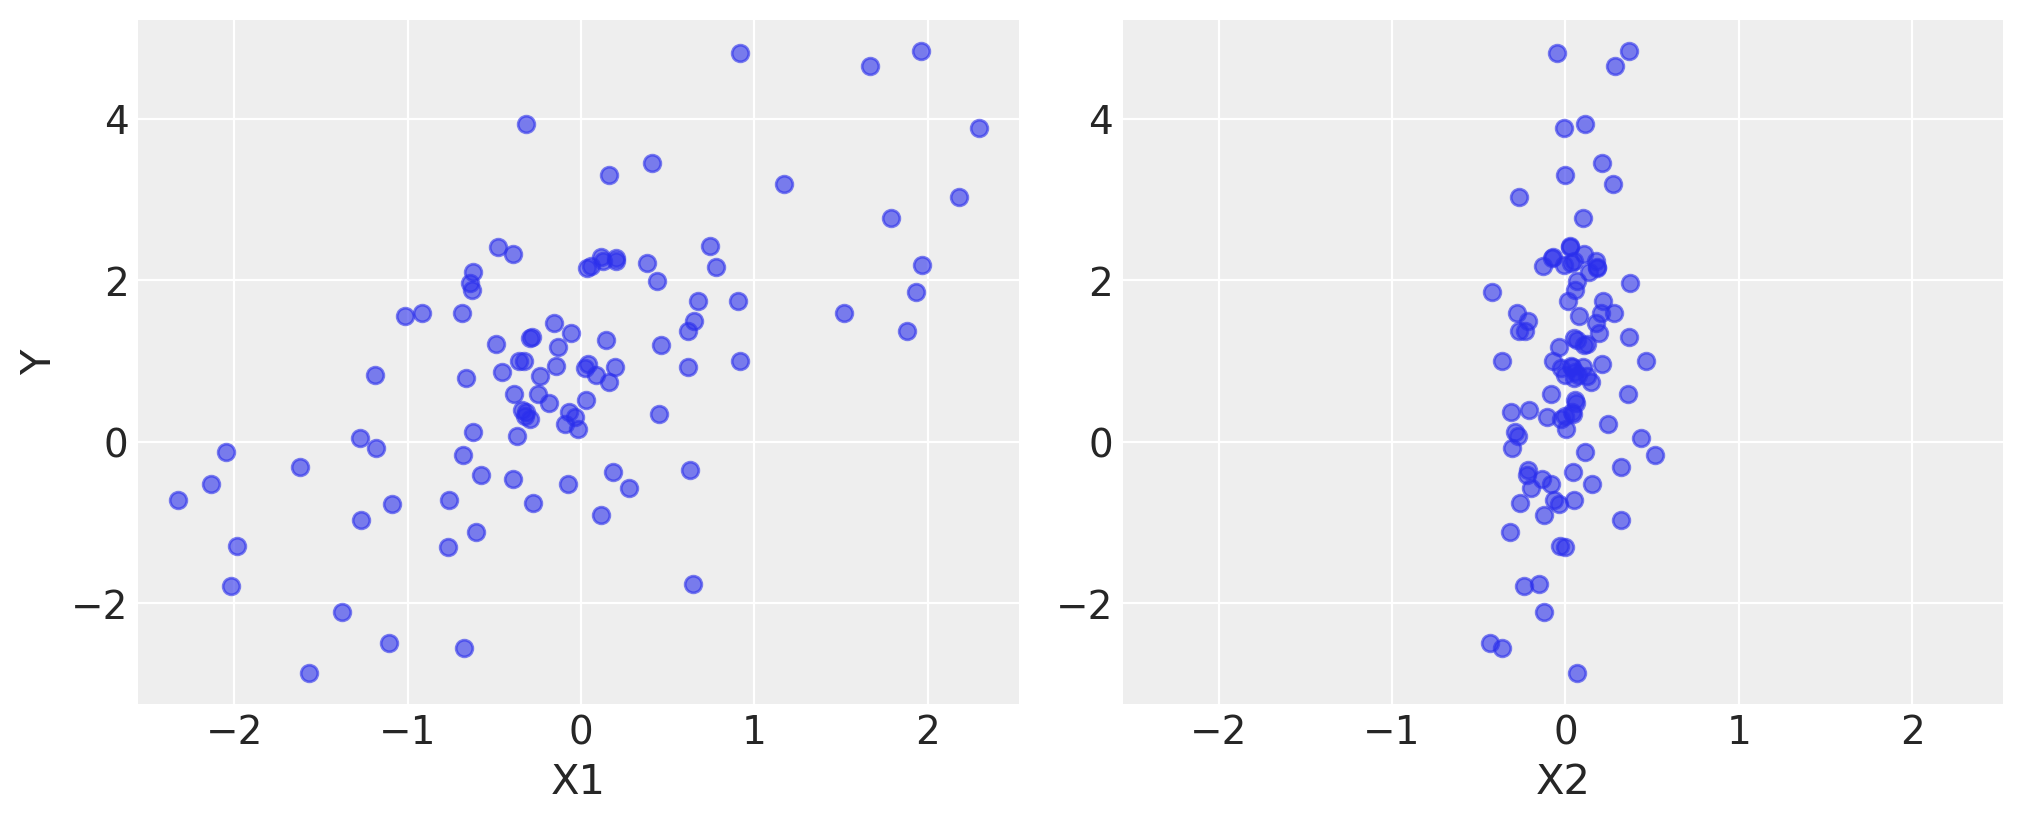

In [11]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10, 4))
axes[0].scatter(X1, Y, alpha=0.6)
axes[1].scatter(X2, Y, alpha=0.6)
axes[0].set_ylabel("Y")
axes[0].set_xlabel("X1")
axes[1].set_xlabel("X2");

In [12]:
import pymc3 as pm

print("Running on PyMC3 v{}".format(pm.__version__))

Running on PyMC3 v3.8


In [13]:
basic_model = pm.Model()

with basic_model:

    # Priors for unknown model parameters
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    beta = pm.Normal("beta", mu=0, sigma=10, shape=2)
    sigma = pm.HalfNormal("sigma", sigma=1)

    # Expected value of outcome
    mu = alpha + beta[0] * X1 + beta[1] * X2

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=Y)

In [14]:
map_estimate = pm.find_MAP(model=basic_model)
map_estimate

logp = -157.69, ||grad|| = 14.913: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 1731.79it/s]


{'alpha': array(0.95724679),
 'beta': array([1.10071814, 2.9511438 ]),
 'sigma_log__': array(0.03540151),
 'sigma': array(1.0360356)}

In [15]:
map_estimate = pm.find_MAP(model=basic_model, method="powell")
map_estimate

  0%|                                                                                                                                                                                    | 0/5000 [00:00<?, ?it/s]C:\Users\maris\anaconda3\envs\pymc3-env\lib\site-packages\scipy\optimize\_minimize.py:518: RuntimeWarning: Method powell does not use gradient information (jac).
  RuntimeWarning)
logp = -156.45, ||grad|| = 0.24264: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 215/215 [00:00<00:00, 2121.22it/s]


{'alpha': array(0.95835519),
 'beta': array([1.1017629 , 2.95394057]),
 'sigma_log__': array(0.03638187),
 'sigma': array(1.03705179)}

In [17]:
with basic_model:
    # draw 500 posterior samples
    trace = pm.sample(500)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta, alpha]
Sampling 4 chains, 0 divergences: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4000/4000 [00:03<00:00, 1059.56draws/s]


C:\Users\maris\anaconda3\envs\pymc3-env\lib\site-packages\arviz\data\io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


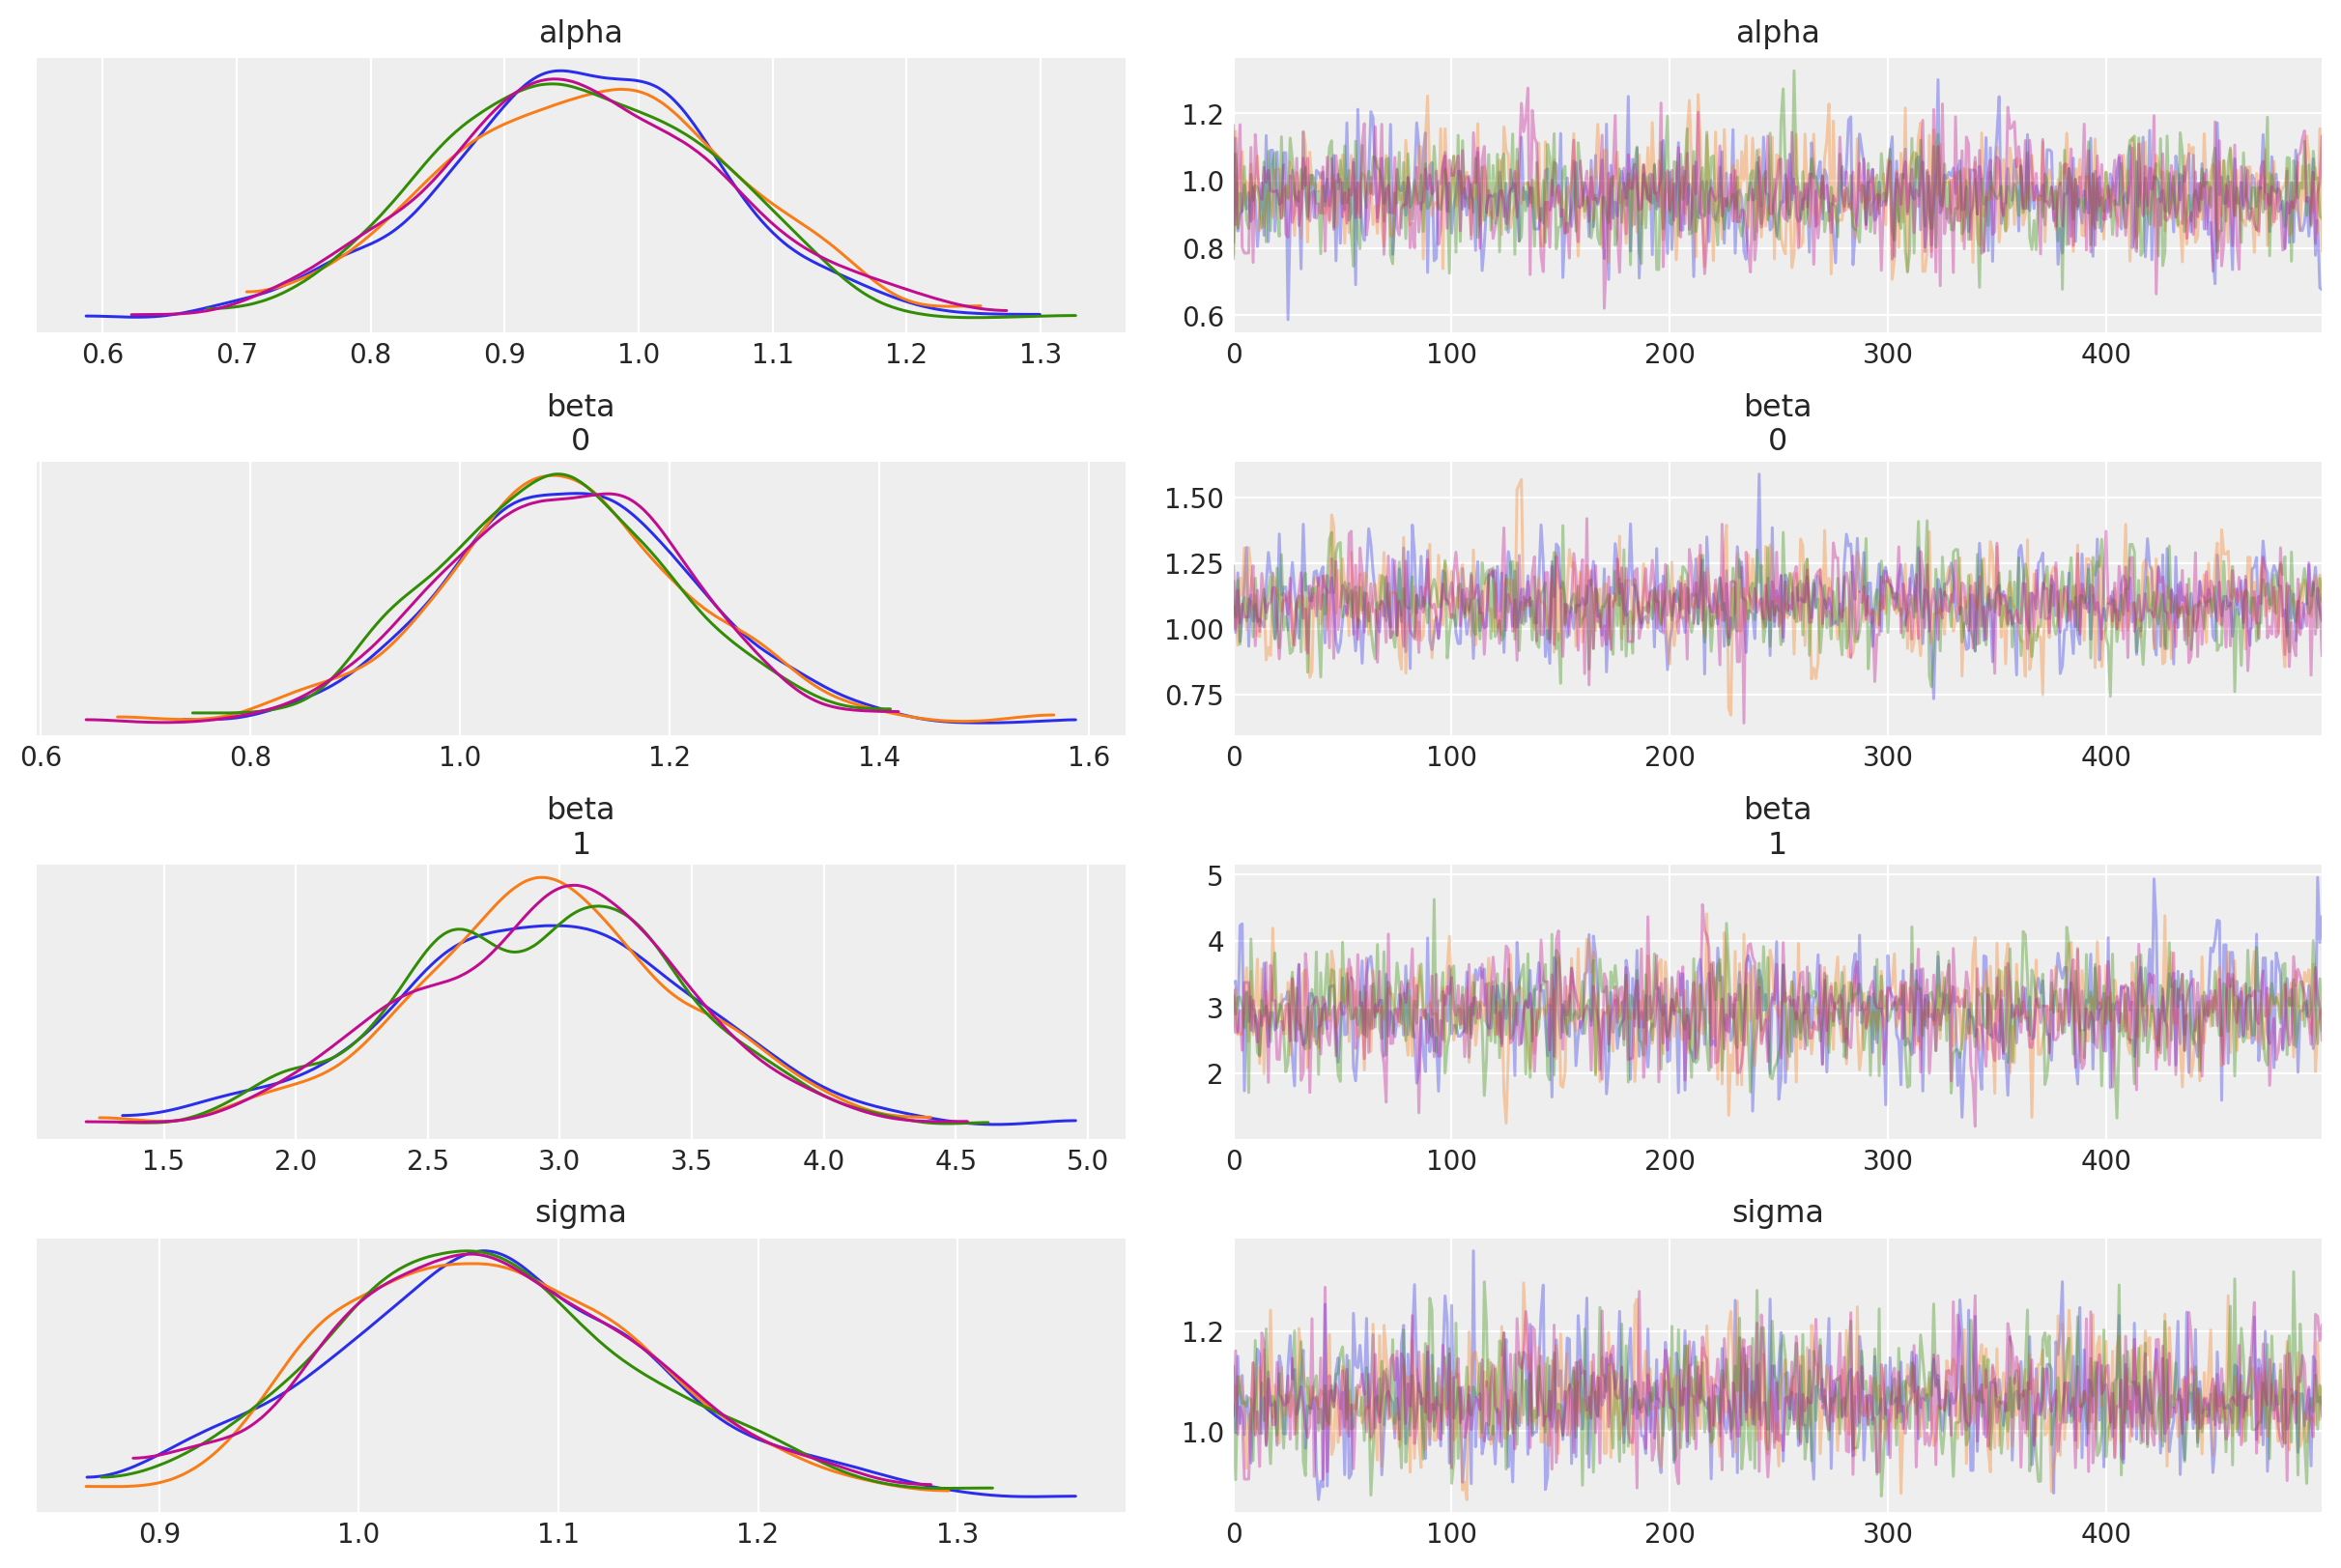

In [18]:
az.plot_trace(trace);

In [20]:
az.summary(trace, round_to=2)

C:\Users\maris\anaconda3\envs\pymc3-env\lib\site-packages\arviz\data\io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
alpha,0.96,0.10,0.76,1.14,0.00,0.00,2756.22,2615.47,2769.66,1505.08,1.0
beta[0],1.10,0.12,0.90,1.32,0.00,0.00,1928.43,1907.32,1952.41,1449.27,1.0
beta[1],2.94,0.53,1.87,3.88,0.01,0.01,2147.73,2043.03,2141.27,1099.51,1.0
sigma,1.07,0.08,0.92,1.22,0.00,0.00,2433.81,2415.01,2405.52,1551.94,1.0
